# Introduction to the Bias-Variance Tradeoff

The bias-variance tradeoff is a fundamental concept in machine learning that helps us understand the tradeoff between underfitting and overfitting in our models. In this section, we will explore what bias and variance are, and how we can balance them to build more generalizable models.

---

## Table of Contents

1. [Understanding Bias and Variance](#1-understanding-bias-and-variance)
2. [Bias-Variance Tradeoff](#2-bias-variance-tradeoff)
3. [Visualizing the Tradeoff](#3-visualizing-the-tradeoff)
4. [Impact on Model Complexity](#4-impact-on-model-complexity)
5. [Conclusion](#5-conclusion)

---

## 1. Understanding Bias and Variance

### **Bias**
Bias refers to the error introduced by approximating a real-world problem, which may be extremely complex, by a much simpler model. High bias models tend to underfit the data.

### **Variance**
Variance refers to the model’s sensitivity to fluctuations in the training data. High variance models tend to overfit the data, capturing noise instead of the underlying pattern.

---

## 2. Bias-Variance Tradeoff

The tradeoff arises because increasing model complexity tends to reduce bias but increase variance, while reducing model complexity tends to increase bias but reduce variance.

- **High Bias:** Simple models with a high error on both training and test sets (underfitting).
- **High Variance:** Complex models with low training error but high error on the test set (overfitting).

The goal is to find a balance between bias and variance that minimizes overall error.

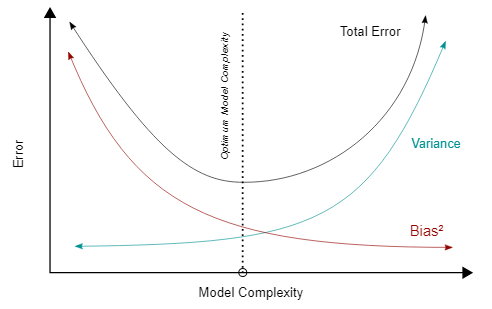

---

## 3. Visualizing the Tradeoff

Let’s visualize the bias-variance tradeoff using a polynomial regression example, where we vary the degree of the polynomial to observe its impact on model bias and variance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.5, X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
def plot_model(degree):
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color="black", label="Test Data")
    plt.plot(X_test, y_test_pred, color="blue", label=f"Degree {degree}")
    plt.title(f"Polynomial Degree: {degree}\nTrain Error: {train_error:.4f}, Test Error: {test_error:.4f}")
    plt.legend()
    plt.show()

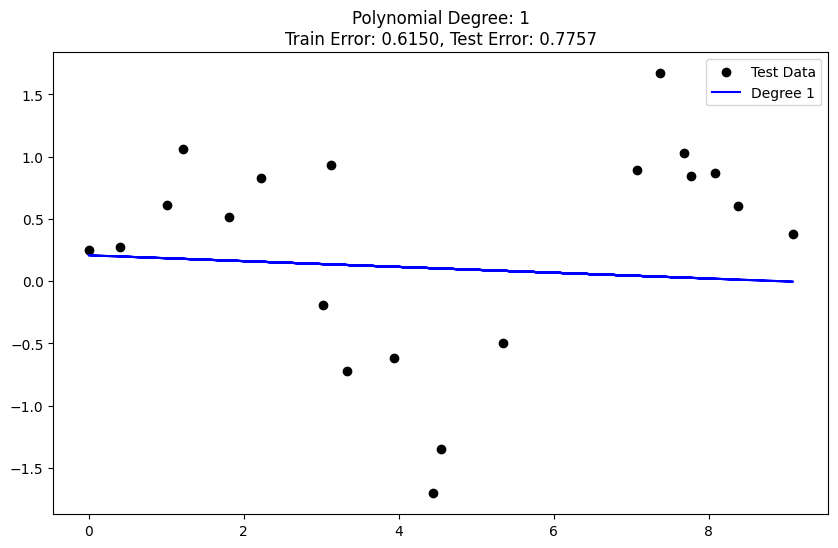

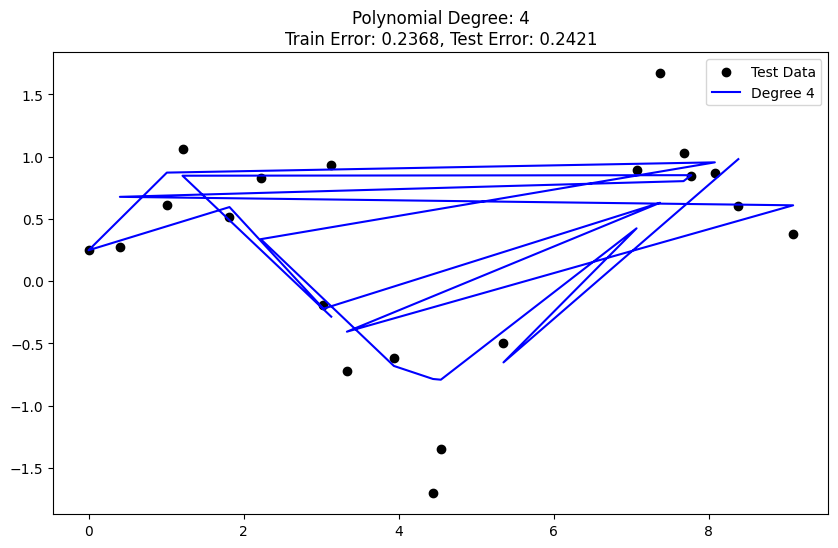

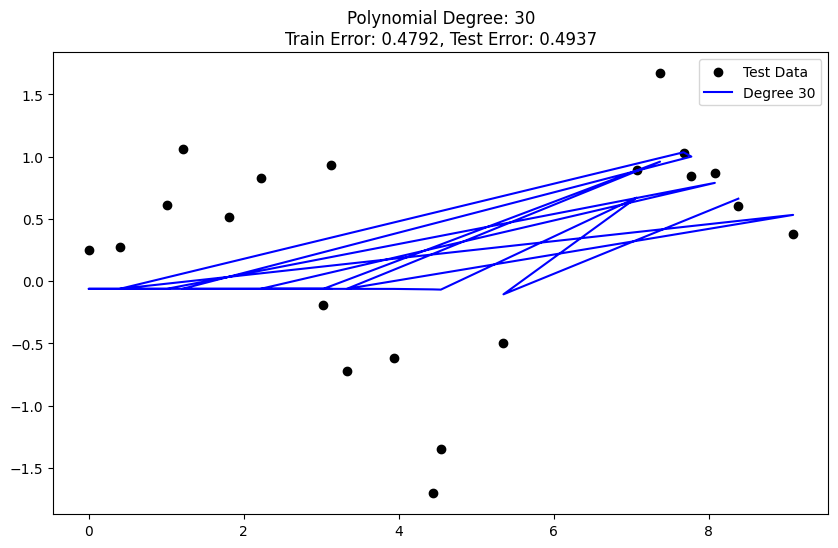

In [6]:
for degree in [1, 4, 30]:
    plot_model(degree)

## 4. Impact on Model Complexity
- Low Complexity Models (e.g., Linear Regression):
	- High bias: Simplified assumptions lead to underfitting.
	- Low variance: The model is not sensitive to small variations in the training data.
- High Complexity Models (e.g., High-degree Polynomial Regression):
	- Low bias: The model captures the data well.
	- High variance: The model becomes overly sensitive to the training data, leading to overfitting.

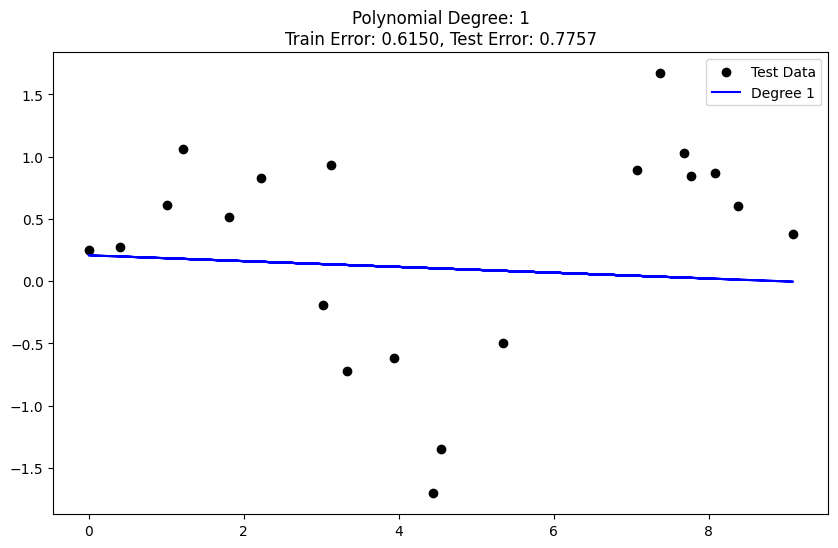

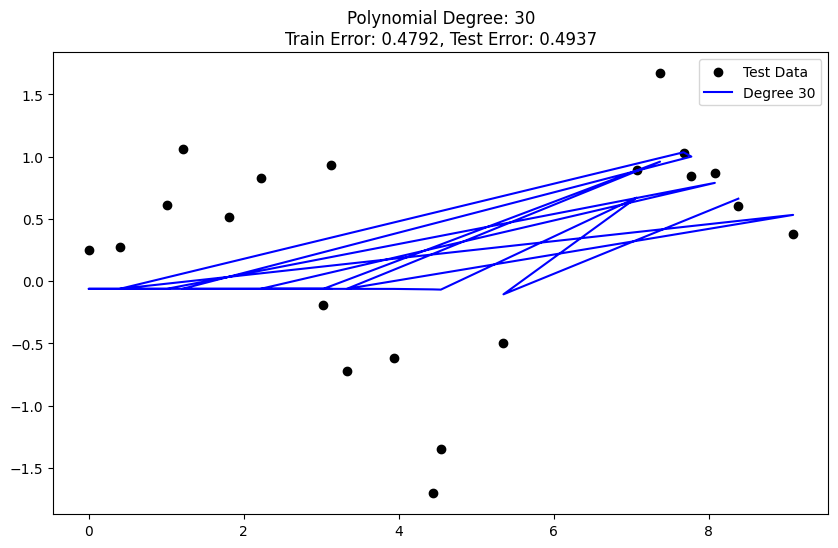

In [7]:
# Degree 1 model (High Bias, Low Variance)
plot_model(1)  # Underfitting

# Degree 15 model (Low Bias, High Variance)
plot_model(30)  # Overfitting

## 5. Conclusion
The bias-variance tradeoff is a critical concept to understand when developing machine learning models. The goal is to find the "sweet spot" of model complexity that minimizes both bias and variance, leading to the best generalization to unseen data.

### Key Takeaways:
- Bias refers to errors due to overly simplistic models.
- Variance refers to errors due to overly complex models.
- Tradeoff: Increasing complexity reduces bias but increases variance, and vice versa.